<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Пол" data-toc-modified-id="Пол-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пол</a></span></li><li><span><a href="#Возраст" data-toc-modified-id="Возраст-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Возраст</a></span></li><li><span><a href="#Зарплата" data-toc-modified-id="Зарплата-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Зарплата</a></span></li><li><span><a href="#Количество-членов-семьи" data-toc-modified-id="Количество-членов-семьи-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Количество членов семьи</a></span></li><li><span><a href="#Страховая-выплата" data-toc-modified-id="Страховая-выплата-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Страховая выплата</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Защита персональных данных клиентов

**Описание целей и задачи проекта**

Страховая компании «Хоть потоп» хочет защитить данные своих клиентов. Необходимо разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Обосновать корректность выбора.

**Описание данных**

Файл с данными содержит таблицуб каждая строка содержит информацию о клиенте:

- Пол
- Возраст
- Зарплата
- Члены семьи (количество членов семьи)
- Страховые выплаты

Пол, возраст и зарплата застрахованного, количество членов его семьи - **Признаки**

Количество страховых выплат клиенту за последние 5 лет - **Целевой признак**

**План работы**

- Загрузить данные и познакомиться с данными 
- Сделать предобработку данных
- Ответьте на вопрос и обоснуйте решение: "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?"
- Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
- Запрограммировать этот алгоритм, применив матричные операции. Проверить, отличается ли качество линейной регрессии из sklearn до и после преобразования. Измерить метрику R2 в обоих случаях.

## Загрузка данных

In [1]:
# библиотеки
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# путь к файлу
pth1 = '/datasets/insurance.csv'
pth2 = '/Users/refresh/Downloads/insurance.csv'

# открытие файла
if os.path.exists(pth1):
    dt = pd.read_csv(pth1)
elif os.path.exists(pth2):
    dt = pd.read_csv(pth2)
else:
    print('Что-то пошло не так')

In [3]:
# смотри информацию
display(dt.sample(5))
dt.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1774,1,26.0,26200.0,0,0
4683,0,18.0,47000.0,0,0
3278,0,41.0,48500.0,1,0
1091,1,41.0,34000.0,1,0
609,0,19.0,45900.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Заголовки переведём на английский и понизим регистр, уберём пробелы. Так же можно все данные привести к целочисленному типу.

In [4]:
# переименование столбцов
dt = dt.rename(columns={'Пол': 'gender',
                        'Возраст': 'age',
                        'Зарплата': 'salary',
                        'Члены семьи': 'family_members',
                        'Страховые выплаты': 'payments'})
# изменение типа данных на целочисленный
dt[['age', 'salary']] = dt[['age', 'salary']].astype('int64')
# проверка
dt.info()
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          5000 non-null   int64
 1   age             5000 non-null   int64
 2   salary          5000 non-null   int64
 3   family_members  5000 non-null   int64
 4   payments        5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


,gender,age,salary,family_members,payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Посмотрим данные отдельно:

### Пол

In [5]:
# значения в столбце пола
dt['gender'].value_counts()

0    2505
1    2495
Name: gender, dtype: int64

С данными по полу всё в норме.

###  Возраст

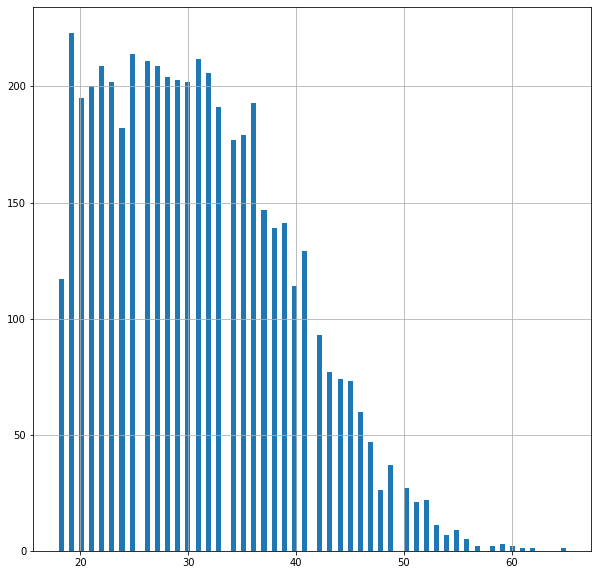

In [6]:
# занчения в столбце возрастов
#dt['age'].value_counts()
plt.figure(figsize=(10, 10))
dt['age'].hist(bins=100);

Данные возраста выглядят правдоподобно.

### Зарплата

count     5000.000000
mean     39916.359400
std       9900.082063
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: salary, dtype: float64

<AxesSubplot:>

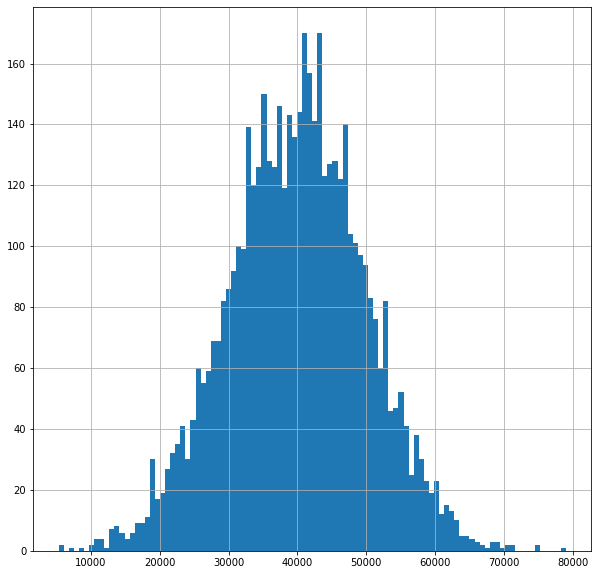

In [7]:
# описание и гистограмма данных по зарплате
display(dt['salary'].describe())
plt.figure(figsize=(10, 10))
display(dt['salary'].hist(bins=100));

In [8]:
# сколько клиентов получают ниже прожиточного минимума
dt.loc[dt['salary'] < 13890, 'salary'].count()

26

Людей, которые получают ниже прожиточного минимума (= 13890 руб. на август 2022 г.) всего 26. Можно их удалить, но задачи такой нет.

### Количество членов семьи

In [9]:
# количество значений в данных о членах семьи
dt['family_members'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: family_members, dtype: int64

По количеству членов семьи данные в порядке.

### Страховая выплата

In [10]:
# количество значений по выплатам страховки
dt['payments'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: payments, dtype: int64

Тоже в норме.

Проверим дубликаты.

In [11]:
# удаляем дубликаты
#size_before = dt.shape[0]
#dt = dt.drop_duplicates().reset_index(drop=True)
#print('Удалено', size_before - dt.shape[0], 'дубликата')

Посмотрим корреляцию

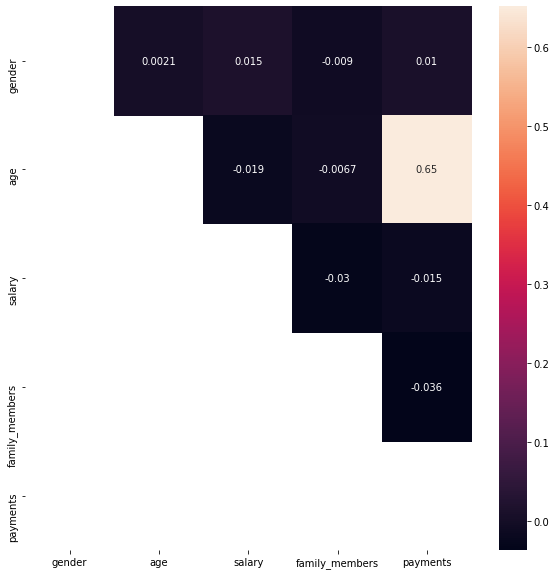

In [12]:
# строим теругольный хитмэп
mask = np.tril(dt.corr())
plt.figure(figsize=(10, 10))
sb.heatmap(dt.corr(), mask=mask, annot = True);

**Выводы**

- в таблице нет пропусков
- заменены названия столбцов
- типы данных сделаны целочисленными
- данные выглядят правдоподобно
- дубликаты удалены
- линейных зависимомтей в данных не видно

Данные подготовлены к дальнейшей работе.

## Умножение матриц

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки ($P^1$ - обратная матрица)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ - единичная матрица 

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** 


Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?


**Ответ:**


Не изменится.


**Обоснование:**


Домножим признаки на обратимую матрицу.

$$
a = XPw
$$

Соответственно

$$
w = ((XP)^T XP)^{-1} (XP)^T y
$$

Для упрощения выражения воспользуемся тремя свойствами мартиц:

$$
(AB)^T = B^T A^T
$$

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

$$
P^{-1} P = P P^{-1} = E
$$

$^*$ P должна быть квадратной матрицей, опрределитель $|P|$ которой не равен нулю

Применяя правила получим

$$
a = XP((XP)^TXP)^{-1}(XP)^Ty
$$
  
    
$$
a = XP(P^TX^TXP)^{-1}P^TX^Ty
$$

Т к матрицы $P^T$, $(X^TX)$ и $P$  (а так же произведение $(X^TX)*P$) являются квадратными, к нми применимо правило 2:

$$
a = XP((P^T)(X^TXP))^{-1}P^TX^Ty
$$


$$
a = XP(X^TXP)^{-1}(P^T)^{-1}P^TX^Ty
$$

$$
a = XP((X^TX)P)^{-1}EX^Ty
$$


$$
a = XP((X^TX)(P))^{-1}EX^Ty
$$


$$
a = XPP^{-1}(X^TX)^{-1}EX^Ty
$$


$$
a = XE(X^TX)^{-1}EX^Ty
$$




Единичные матицы являются нейтральным элементом - их можно убрать:


$$
a = X(X^TX)^{-1}X^Ty
$$

т к $w = (X^T X)^{-1} X^T y$, получается 

$$
a = Xw
$$

Разделим данные на признаки и целевой признак. Далее на обучающую и тестовую выборки и посчитаем R2 на модели линейной регрессии из sklearn

In [13]:
X = dt.drop('payments', axis=1)
y = dt['payments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
R2_sklearn = r2_score(y_test, pred)
print('R2 =', R2_sklearn)

R2 = 0.38882423984338166


Обратимыми бывают лишь квадратные матрицы, определитель которых не равен нулю. В нашем случае это матрица размером (4x4), к т количество признаков равно 4. Приведу 3 примера, со случайными числами. И посчитаем метрику R2 после умножения признаков на эти матрицы.

In [14]:
# задаём размер матрицы
size = X.shape[1]
# делаем три случайные матрицы заданного размера
for i in range(3):
    matrix = pd.DataFrame(np.random.randint(0,10,size=(size, size)))
     # если определитель не равен нулю, перемножаем матрицу с признаками, обучаем модель и считаем R2
    if np.linalg.det(matrix) != 0:
        display(matrix)
        X2 = np.dot(X, matrix)
        model.fit(X2, y)
        pred2 = model.predict(X2)
        print('R2 =', r2_score(y, pred2))
    i += 1

,0,1,2,3
0,0,2,5,9
1,9,2,4,2
2,0,7,8,0
3,0,2,1,7


R2 = 0.42494550308171974


,0,1,2,3
0,4,7,4,1
1,5,9,2,7
2,4,2,0,6
3,3,2,6,9


R2 = 0.4249455030817


,0,1,2,3
0,2,1,5,3
1,7,2,9,9
2,8,4,6,4
3,9,0,0,6


R2 = 0.42494550308167034


Метрика не меняется.

Приведём примеры с необратными матрицами.

- нулевая матрица
- это все неквадратные матрицы
- марицы с линейно зависимыми строками или столбцами (в моём примере столбец 2 получается умножением стобца один на пять)

In [15]:
print('нулевая матрица')
matrix_zeros = np.zeros((4, 4))
display(pd.DataFrame(matrix_zeros))
print('определитель =', np.linalg.det(matrix_zeros))
#print(np.linalg.inv(matrix_zeros)) - LinAlgError: Singular matrix (чтобы ошибка не вылезла)
print('')
print('Неквадратная матрица')
matrix_4_3 = pd.DataFrame(np.random.randint(0,100,size=(4, 3)))
display(matrix_4_3)
#print(np.linalg.inv(matrix_zeros)) - LinAlgError: Singular matrix (чтобы ошибка не вылезла)
print('')
print('Линейно зависимая матрица')
matrix_lin = pd.DataFrame(np.random.randint(0,100,size=(4, 4)))
matrix_lin[0] = matrix_lin[0] *0 + 1
matrix_lin[1] = matrix_lin[1] *0 + 5
display(matrix_lin)
print('определитель =', np.linalg.det(matrix_lin))
#print(np.linalg.inv(matrix_lin)) - LinAlgError: Singular matrix (чтобы ошибка не вылезла)

нулевая матрица


,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


определитель = 0.0

Неквадратная матрица


,0,1,2
0,1,46,52
1,0,83,10
2,90,97,91
3,92,98,3



Линейно зависимая матрица


,0,1,2,3
0,1,5,16,68
1,1,5,68,74
2,1,5,29,13
3,1,5,8,9


определитель = 0.0


## Алгоритм преобразования


**Алгоритм**

    1 Создаём обратимую матрицу
    2 Проверяем её на обратимость
    3 Умножаем признаки X на мартицу A
    4 Находим обратную матрицу A и умножаем на неё закодированные признаки
    5 Сравниваем изначальные данные и декодированные, если различий нет, алгоритм шифрования работает.
    
**Алгоритм линейной регрессии:**
    
    1 В матрицу закодированных (!) признаков X добавим столбец, состоящий только из единиц (он идёт нулевым); а параметр w0 — к вектору w (он тоже идёт нулевым)
    2 Умножаем тарнспонированную матрицу признаков на себя
    3 От результата вычисляем обратную матрицу
    4 Умножаем предыдущий результат на транспонированную матрицу признаков
    5 Умножаем предыдущий результат на вектор целевого признака
    6 Сохраняем величину сдвига w0
    7 Сохраняем вектор предсказаний
    8 Получаем предсказания: уножаем матрицу признаков на вектор предсказний и прибовляем величину сдвига
    9 Считаем метрику R2 и сравниваем с аналогичной метрикой, полученной из модели sklearn.
    
    
**Обоснование алгоритма шифрования**

Воспользуемся свойством обратных матриц:

$$
P^{-1} P = P P^{-1} = E
$$

Чтобы данные зашифровать умножим на обратимую матрицу признаки

$$
A X = B
$$

Домножим обе части уровнения на обратную матрицу

$$
A^{-1} A X = A^{-1} B
$$

$$
X = A^{-1} B
$$

Следовательно расшифровать данные обратно можно с помощью обратной матрицы $A^{-1}$

        

**Программирование линейной регрессии**

Предсказания линейной регрессии (a) вычисляется так: скалярно умножается вектор признаков на вектор весов (w), затем к этому произведению прибавляется величина сдвига предсказания (w0):

$$
a = (X,w) +w0
$$

Для сокращения записи изменим обозначения. В матрицу X добавим столбец, состоящий только из единиц (он идёт нулевым); а параметр w0 — к вектору w (он тоже идёт нулевым):


$$
a = Xw
$$

Т к (y) - вектор целевого признака, то задача обучения линейной регрессии для функции потерь:

$$
w = \arg\min_w MSE(Xw, y)
$$

Функция argmin() находит минимум и возвращает, при каком аргументе он был достигнут.

Минимальное значение функции получается, когда веса равны этой величине:

$$
w = (X^T X)^{-1} X^T y
$$

## Проверка алгоритма

Создадим обратимую матрицу $A$

In [16]:
# создаём обратимую матрицу
rng = np.random.RandomState(25)
A = rng.randint(0,10,size=(4, 4))
print(A)

[[4 6 7 2]
 [8 4 9 4]
 [5 1 7 3]
 [8 7 3 4]]


Проверяем её на обратимость

In [17]:
if np.linalg.det(A) == 0:
    print('матрица необратима, необходимо создать необратимую матрицу')
else:
    print('матрица обратима')

матрица обратима


Умножаем признаки $X$ на мартицу $A$

In [18]:
# кодируем
X_code = X.dot(A)
X_code

,0,1,2,3
0,248340,49777,347579,148970
1,190376,38191,266417,114188
2,105232,21116,147261,63116
3,208684,41798,292095,125192
4,130728,26218,182959,78414
...,...,...,...,...
4995,178740,35826,250158,107220
4996,262280,52543,367109,157340
4997,169676,33994,237486,101788
4998,163704,32815,229114,98202


Данные выглядят нечитаемо.

Находим обратную матрицу $A^{-1}$  и умножаем на неё закодированные признаки

In [19]:
#обратная
A_inv = np.linalg.inv(A)
X_decode = X_code.dot(A_inv)
X_decode = abs(round(X_decode))
X_decode

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0
...,...,...,...,...
4995,0.0,28.0,35700.0,2.0
4996,0.0,34.0,52400.0,1.0
4997,0.0,20.0,33900.0,2.0
4998,1.0,22.0,32700.0,3.0


Сравним изначальные данные и декодированные:

In [20]:
X_decode.columns = X.columns
rez = X.merge(X_decode, how = 'inner' ,indicator=True)
rez['_merge'].value_counts()

both          5318
left_only        0
right_only       0
Name: _merge, dtype: int64

Различий в данных нет, алгоритм работает.

Запрограммируем алгоритм линейной регрессии.

In [21]:
# сделаем новый класс для алгоритма регрессии
class MyLinearRegression:
    # обучение
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) # добавляем нулевой столбец из единиц
        A = np.dot(X.T, X)   # умножаем тарнспонированную матрицу признаков на себя
        B = np.linalg.inv(A) # вычисляем обратную матрицу
        C = np.dot(B, X.T)   # умножаем предыдущий результат на транспонированную матрицу признаков
        w = np.dot(C,y)      # умножаем предыдущий результат на вектор целевого признака
        self.w0 = w[0]       # сохраняем величину сдвига w0
        self.w = w[1:]       # сохраняем вектор предсказаний
    # предсказание
    def predict(self, X):
        return np.dot(X, self.w) + self.w0

In [22]:
# кодируем признаки
X_train_code = X_train.dot(A)
X_test_code = X_test.dot(A)

# используем класс MyLinearRegression
my_model = MyLinearRegression()
my_model.fit(X_train_code, y_train)
predictions = my_model.predict(X_test_code)
print('R2 на созданной модели с зашифрованными даннми', r2_score(y_test, predictions))
print('R2 модели из sklearn с исходными данными', R2_sklearn)

R2 на созданной модели с зашифрованными даннми 0.38882419519269895
R2 модели из sklearn с исходными данными 0.38882423984338166


Результаты метрики совпадают до седьмого знака после запятой включительно.

# Вывод по исследованию

Данные были предобраьотаныи подготовлены к исследованию.

Вопрос: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Ответ: Не изменяться. Обоснование приведено в разделе "Умножение матриц".

Так же приведены исключения:
- линейно зависимые матрицы
- неквадратные матрицы
- нулевые матрицы

При них обратныая матрица не существует.

Реализован и обоснован алгоритм шифрования с помощью свойств обратной матрицы. Проверено, что качество регрессии на нём не падает по ставнению с библотекой sklearn.



## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования